In [ ]:
# Clustering

In [ ]:
# Imports
import pandas as pd
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.cluster import hierarchy
%matplotlib inline

In [ ]:
# Part 1: Downloading the dataset and dropping the labels

missing_values = [" ?"]
label_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None, na_values = missing_values)

data = label_data.drop([0, 1], axis=1)

data.head()

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Text(0, 0.5, 'SSE')

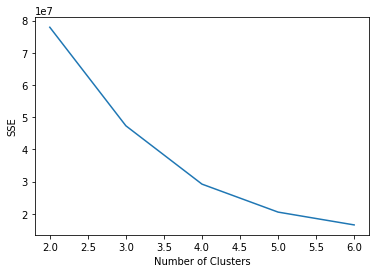

In [ ]:
# Part 1

numClusters = [2, 3, 4, 5, 6]
SSE = []

# Part 1.1: Perform k-means clustering on different datasets (use k = 2, 3,..., 6)
for k in numClusters:

    # Part 1.2: Calculate the SSE
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

# Part 1.2: Plot sum-of-squared errors (SSE) versus k
plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [ ]:
# Part 1.3: Find the best k using the elbow approach
print('Based on the "elbow" in the plot above, k=4 seems to be the best k-value for this dataset since there are two slight elbows at k=3 and k=4')

Based on the "elbow" in the plot above, k=4 seems to be the best k-value for this dataset since there are two slight elbows at k=3 and k=4


In [ ]:
# Part 1.4: Find the centers of clusters and  find the top-5 closest points to the center of each cluster
k_means = cluster.KMeans(n_clusters=4)
k_means.fit(data)
SSE.append(k_means.inertia_)

centroids = k_means.cluster_centers_

# Finding the distance between each data point and each cluster centroid using Euclidean distance
centroid_dist = pairwise_distances(centroids, data.to_numpy(), metric='euclidean')

# Using argsort to find the closest points to the centroid
for i in range(4):
    dist = centroid_dist[i]
    closest_points = np.argsort(dist)
    sorted_dist = dist[closest_points]

    print("For centroid", i, ", here are the top-5 closest points:")
    for i in range(5):
        print("\tPoint", i, ": the", closest_points[i], "entry in the dataset, with a euclidean distance of", sorted_dist[i], "to the centroid")




For centroid 0 , here are the top-5 closest points:
	Point 0 : the 513 entry in the dataset, with a euclidean distance of 13.630898870941323 to the centroid
	Point 1 : the 340 entry in the dataset, with a euclidean distance of 15.601744288227474 to the centroid
	Point 2 : the 311 entry in the dataset, with a euclidean distance of 21.42052765565678 to the centroid
	Point 3 : the 448 entry in the dataset, with a euclidean distance of 28.621036756607495 to the centroid
	Point 4 : the 225 entry in the dataset, with a euclidean distance of 28.95234554716772 to the centroid
For centroid 1 , here are the top-5 closest points:
	Point 0 : the 433 entry in the dataset, with a euclidean distance of 31.572850185705942 to the centroid
	Point 1 : the 282 entry in the dataset, with a euclidean distance of 36.72934043478467 to the centroid
	Point 2 : the 85 entry in the dataset, with a euclidean distance of 51.81926477395122 to the centroid
	Point 3 : the 42 entry in the dataset, with a euclidean dist

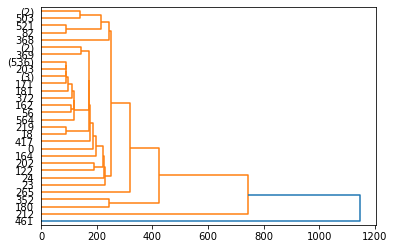

In [ ]:
# Part 2

# Part 2.1: Perform hierarchical clustering (Single Link)
single_link = hierarchy.linkage(data.to_numpy(), 'single')
dn = hierarchy.dendrogram(single_link, orientation='right', truncate_mode='lastp')

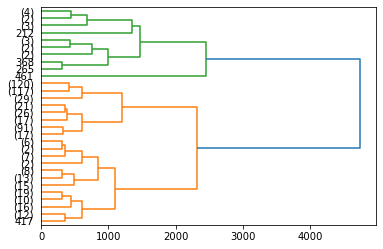

In [ ]:
# Part 2.2: Perform hierarchical clustering (Complete Link)
complete_link = hierarchy.linkage(data.to_numpy(), 'complete')
dn = hierarchy.dendrogram(complete_link, orientation='right', truncate_mode='lastp')

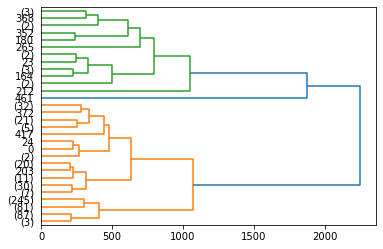

In [ ]:
# Part 2.3: Perform hierarchical clustering (Group Average)
group_avg = hierarchy.linkage(data.to_numpy(), 'average')
dn = hierarchy.dendrogram(group_avg, orientation='right', truncate_mode='lastp')

In [ ]:
# Note: All of the dendrograms are truncated for easier interpretation